# Wrange and Analyze Project



- Programmer: Chaudhary Sarimurrab
- Date: 25/apr/2020

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import tweepy 
import json
import re
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

### Gathering Data


- WeRateDogs Twitter archive --> twitter_archive_enhanced.csv

- tweet image prediction from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv



In [2]:
data_f = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# Download dog_image_prediction using Request library

import os
import requests


folder_name = 'image_predictions' #
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
image_dataf= pd.read_csv('image-predictions.tsv', sep='\t')
image_dataf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Twitter API from Json

In [4]:
# Read text file line by line to create dataframe
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [5]:
# Reduce df_api to the necessary columns
tweet_dataf = df_api[['id', 'retweet_count', 'favorite_count']]
 
tweet_dataf.head(7)

,id,retweet_count,favorite_count
0,892420643555336193,8315,38014
1,892177421306343426,6142,32641
2,891815181378084864,4067,24565
3,891689557279858688,8450,41365
4,891327558926688256,9157,39551
5,891087950875897856,3046,19860
6,890971913173991426,2019,11614


## ASSESSING

After gathering , assessing should be done visually and programatically for quality and tidiness isuues. Atleast eight quality issues and two tidiness issues.

In [6]:
data_f

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#Summary of data_f
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
data_f.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [9]:
data_f.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
#Detect missing values
data_f.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
data_f[data_f.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [12]:
#Detect non-missing values for an array-like object.
data_f[data_f.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [13]:
image_dataf 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
#Summary of image_dataf 
image_dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet_dataf 

,id,retweet_count,favorite_count
0,892420643555336193,8315,38014
1,892177421306343426,6142,32641
2,891815181378084864,4067,24565
3,891689557279858688,8450,41365
4,891327558926688256,9157,39551
5,891087950875897856,3046,19860
6,890971913173991426,2019,11614
7,890729181411237888,18445,64155
8,890609185150312448,4183,27288
9,890240255349198849,7215,31306


In [16]:
#Summary of tweet_dataf 
tweet_dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id                2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


# ***************QUALITIY AND TIDINESS ISSUES****************

A retweet is not an original tweet instead it a tweet again posted by other user.

So, there is a column **retweet_count** which provides the information about number of times a tweet has been retweeted.


### QUALITY ISSUES

**`data_f`**

1. As we can see by retweeted_status_id, there is 181 retweets
2. Missing data in expanded_urls (Tweets without images) for example For row number 30,55,64 etc
4. All images aren't dog images.
5. As we can see by rating_numerator and rating_denomenator that all ratings are not correct
6. As we can see by data_f.name that there are some incorrect dog names (a, an, the etc.) For example for row number 2327, 2333,  2334, 2335 etc
7. As we can see by data_f.name that there are some missing values in dog names as "None".
8. Inaccurate datatype for tweet_id(int64) and timestamp(object)
9. Very Inefficient to understand the source from source column
10. Dog stage type --> categorical

**`image_dataf `**

In [17]:
print(image_dataf.shape)

(2075, 12)


10. There are some missing records. image_dataf.shape Showing 2075 data instead of 2356 which means there can be retweets,None, replies etc.
- Some images are  not dogs for example row number 29 in image_dataf is a fish.
- Lowercase breed_names in p1, p2, p3 and underscore is used instead of space for example row number 0,1,2 etc

**`tweet_dataf `**

14. rename id to tweet_id so can merge all the data frame.

### TIDINESS ISSUES

15. Delete or drop insignificant columns for example **retweeted_status_id**,**retweeted_status_user_id** etc.
- Merge all three data frames.
- Combine dog stages into one column that is doggo, floofer, pupper, and puppo.
- Combine rating_numerator and rating_denominator into one_column.


## Data Cleaning

In [18]:
# Copying the dataframe for the purpose of cleaning
clean_data_f = data_f.copy()
clean_image_dataf  = image_dataf.copy()
clean_tweet_dataf  = tweet_dataf.copy()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1. Removing retweets

**Define**


Remove 181 retweets which are detected by retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. By setting Null values to  these columns

**Code**

In [19]:
clean_data_f = clean_data_f[clean_data_f.retweeted_status_id.isnull()]

**Test**

In [20]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

2. Missing data in expanded_urls (Tweets without images) for example For row number 30,55,64 etc

**Define**

Remove the tweets having no expanded_urls by keeping the non-null data in the expanded_urls column.

**Code**

In [21]:
clean_data_f = clean_data_f[clean_data_f.expanded_urls.notnull()]

**Test**

In [22]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

Cleaning those tweets having no expanded_urls also dropped some reply tweets.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

14. rename id to tweet_id so can merge all the data frame.

**Define**

renaming id to tweet_id.

**Code**

In [23]:
clean_tweet_dataf.rename({'id': 'tweet_id'}, axis=1, inplace=True)

**Test**

In [24]:
clean_tweet_dataf.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

16. Merge all three data frames.

**Define**

Merging the **clean_tweet_dataf** and **image_dataf tables** to the **clean_data_f** by both joining on tweet_id.

**Code**

In [25]:
# First, merge df_tweet_clean table to the df_twitter_archive_clean
clean_data_f = pd.merge(clean_data_f, clean_tweet_dataf, 
                                    on = ['tweet_id'], how = 'left')

In [26]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 19 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
retweet_count                 2114 non

In [27]:
# Second, merge image_dataf table to the clean_data_f
clean_data_f = pd.merge(clean_data_f, image_dataf, 
                                    on = ['tweet_id'], how = 'left')

**Test**

In [28]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 30 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
retweet_count                 2114 non

After merging the data frames, keep the tweets with images.

In [29]:
clean_data_f = clean_data_f[clean_data_f.jpg_url.notnull()]


In [30]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1991 non

Dropping the tweets having no retweet_count

In [31]:
clean_data_f = clean_data_f[clean_data_f.retweet_count.notnull()]

In [32]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2116
Data columns (total 30 columns):
tweet_id                      1991 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1991 non-null object
source                        1991 non-null object
text                          1991 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1991 non-null object
rating_numerator              1991 non-null int64
rating_denominator            1991 non-null int64
name                          1991 non-null object
doggo                         1991 non-null object
floofer                       1991 non-null object
pupper                        1991 non-null object
puppo                         1991 non-null object
retweet_count                 1991 non

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

15. Delete or drop insignificant columns for example retweeted_status_id,retweeted_status_user_id etc.

**Define**

Dropping those columns because those columns are related to the retweets & replies that is **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**, **in_reply_to_status_id**, **in_reply_to_user_id**.

**Code**

In [33]:
clean_data_f = clean_data_f.drop(['retweeted_status_id','retweeted_status_user_id',
                              'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

**Test**

In [34]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2116
Data columns (total 25 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
doggo                 1991 non-null object
floofer               1991 non-null object
pupper                1991 non-null object
puppo                 1991 non-null object
retweet_count         1991 non-null float64
favorite_count        1991 non-null float64
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null object
p2                    1991 non-null object
p2_conf               1991 non-n

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

17. Combine dog stages into one column that is doggo, floofer, pupper, and puppo.


**Define**

Access doggo, floofer, pupper and puppo from the text column using pandas' str.extact method and place them in newly created dog_stage column and also fill up null values with None.

In [35]:
clean_data_f[clean_data_f['text'].str.contains('floofer')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
42,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
453,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,...,2.0,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
595,776218204058357768,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,...,1.0,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True


Only three tweets related to floofer. In the Dogtionary it is termed as 'floof' So considering this.



In [36]:
clean_data_f[clean_data_f['text'].str.contains('floof')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,...,1.0,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
42,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
49,881906580714921986,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,None,None,...,1.0,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
341,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,...,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
453,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,...,2.0,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
473,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,https://twitter.com/dog_rates/status/796080075...,12,10,Yogi,None,None,...,1.0,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
479,794332329137291264,2016-11-04 00:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,None,None,...,1.0,Samoyed,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True
571,780543529827336192,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,https://twitter.com/dog_rates/status/780543529...,12,10,None,None,None,...,1.0,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
595,776218204058357768,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,...,1.0,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True
609,773922284943896577,2016-09-08 16:33:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",https://twitter.com/dog_rates/status/773922284...,12,10,Heinrich,None,None,...,1.0,Pomeranian,0.554331,True,Samoyed,0.432158,True,chow,0.003199,True


Now there are more tweets that is 22.

**Code**

In [37]:
clean_data_f['dog_stage'] = clean_data_f['text'].str.extract('(doggo|floof|pupper|puppo)',
                                                                             expand=True)
clean_data_f = clean_data_f.drop(['doggo','floofer','pupper','puppo'], axis=1)
clean_data_f['dog_stage'].fillna('None', inplace=True)

**Test**

In [38]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
retweet_count         1991 non-null float64
favorite_count        1991 non-null float64
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null object
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null object
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non

In [39]:
clean_data_f.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8315.0,38014.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6142.0,32641.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4067.0,24565.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8450.0,41365.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9157.0,39551.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [40]:
clean_data_f[['dog_stage']]

,dog_stage
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,doggo


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

11. Some images are not dogs for example row number 29 in image_dataf is a fish.

**Define**

Dropping the images that do not contain dogs by analyzing ratings and text from the clean_data_f.

**Code**

In [41]:
# rating_numerator is usually greater than 10, 0 is an extreme value so tweets with numerator of 0 should be checked
clean_data_f.query('rating_numerator == 0')[['text','expanded_urls']]

,text,expanded_urls
249,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...
807,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...


Dropping these two with the 0 rating_numerator are not dogs images.

In [42]:
clean_data_f = clean_data_f.drop(labels=[249,807],axis=0)

Test

In [43]:
clean_data_f.query('rating_numerator == 0')[['text','expanded_urls']]

,text,expanded_urls


Following statements are written in the text when an image is of other than dogs---> 'not pet','only rate dogs','only send dogs','only send in dogs', 'stop sending',  'w/out a dog','without a dog'. 
Removing these tweets.

In [44]:
other_than_dog = 'not pet|only send in dogs|only send dogs|only rate dogs|stop sending|without a dog| w/out a dog'

Removing these tweets.

In [45]:
clean_data_f[clean_data_f['text'].str.contains(other_than_dog)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,5837.0,30002.0,...,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,floof
43,883117836046086144,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,None,6531.0,36470.0,...,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True,None
54,880872448815771648,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,None,3741.0,20880.0,...,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True,None
79,875021211251597312,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,https://twitter.com/dog_rates/status/875021211...,12,10,None,4646.0,25058.0,...,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True,None
82,874057562936811520,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",https://twitter.com/dog_rates/status/874057562...,12,10,None,3905.0,22303.0,...,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True,None
97,870804317367881728,2017-06-03 00:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,https://twitter.com/dog_rates/status/870804317...,11,10,None,6163.0,33253.0,...,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False,None
109,867900495410671616,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,https://twitter.com/dog_rates/status/867900495...,12,10,None,4181.0,24065.0,...,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True,None
112,867051520902168576,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",https://twitter.com/dog_rates/status/867051520...,13,10,None,7888.0,32103.0,...,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True,None
120,864873206498414592,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,None,8757.0,32258.0,...,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False,None
131,862096992088072192,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,None,23577.0,74737.0,...,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True,None


In [46]:
clean_data_f = clean_data_f[~clean_data_f['text'].str.contains(other_than_dog)]

**Test**

In [47]:
clean_data_f[clean_data_f['text'].str.contains(other_than_dog)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [48]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              1913 non-null int64
timestamp             1913 non-null object
source                1913 non-null object
text                  1913 non-null object
expanded_urls         1913 non-null object
rating_numerator      1913 non-null int64
rating_denominator    1913 non-null int64
name                  1913 non-null object
retweet_count         1913 non-null float64
favorite_count        1913 non-null float64
jpg_url               1913 non-null object
img_num               1913 non-null float64
p1                    1913 non-null object
p1_conf               1913 non-null float64
p1_dog                1913 non-null object
p2                    1913 non-null object
p2_conf               1913 non-null float64
p2_dog                1913 non-null object
p3                    1913 non-null object
p3_conf               1913 non-null float64
p3_dog                1913 non

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

5. As we can see by data_f.name that there are some incorrect dog names (a, an, the etc.) For example for row number 2327, 2333, 2334, 2335 etc

**Define**

Names are mostly extracted after the statements 'This is','Here is', 'hello to', 'Meet'. 
So number of words such as-- a, an, the, etc.
All those words are lowercase. Finding the lowercase names in name_cloumn and reextract names that come after the statement-- 'name is' and 'named' and Replace the other lowercase names by 'None'. And replace name 'O' with "O'Malley".

**Code**

In [49]:
clean_data_f[clean_data_f['name'].str.len() == 1][['name', 'text']]

,name,text
51,a,Here is a pupper approaching maximum borkdrive...
497,a,Here is a perfect example of someone who has t...
596,O,This is O'Malley. That is how he sleeps. Doesn...
795,a,This is a mighty rare blue-tailed hammer sherk...
797,a,Viewer discretion is advised. This is a terrib...
838,a,This is a very rare Great Alaskan Bush Pupper....
1126,a,Here is a heartbreaking scene of an incredible...
1136,a,Here is a whole flock of puppers. 60/50 I'll ...
1146,a,This is a Butternut Cumberfloof. It's not wind...
1153,a,This is a Wild Tuscan Poofwiggle. Careful not ...


In [50]:
clean_data_f['name'] = clean_data_f['name'].str.replace('O', "O'Malley")

In [51]:
#looking at complete line
pd.set_option('display.max_colwidth',-1)
clean_data_f.query('name == "a"')['text']

51      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
497     Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq                           
795     This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW               
797     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R                 
838     This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa                 
1126    Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu                                         
1136    Here is 

All are the lowercase.

In [52]:
clean_data_f.loc[clean_data_f['name'].str.islower()][['name', 'text']]

,name,text
21,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
51,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
292,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
497,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
659,my,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
722,one,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k
785,his,That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7
786,one,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd
795,a,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
797,a,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R


Again extract names following the statements 'name is' and 'named'.

In [53]:
new_names_df = clean_data_f[clean_data_f['name'].str.islower()]
for text in new_names_df.text:
    found = re.findall(r'(?:named|name is)\s(\w+)', text)
    mask = clean_data_f['text'] == text
    if len(found) > 0:
        clean_data_f.loc[mask, 'name'] = found[0]
    else:
        clean_data_f.loc[mask, 'name'] = 'None'

In [54]:
clean_data_f.loc[clean_data_f['name'].str.islower()]['name'].count()

0

In [55]:
clean_data_f.query('name == "None"')['name'].count()

545

Checking for 'None' Names

In [56]:
new_names_none = clean_data_f[clean_data_f['name']== 'None']
for text in new_names_none.text:
    found = re.findall(r'(?:named|name is)\s(\w+)', text)
    mask = clean_data_f['text'] == text
    if len(found) > 0:
        clean_data_f.loc[mask, 'name'] = found[0]
    else:
        clean_data_f.loc[mask, 'name'] = 'None'

Test

In [57]:
clean_data_f.loc[clean_data_f['name'].str.islower()]['name'].count()

0

In [58]:
clean_data_f.query('name == "None"')['name'].count()

538

More names are accessed from None.

In [59]:
clean_data_f

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8315.0,38014.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6142.0,32641.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4067.0,24565.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8450.0,41365.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9157.0,39551.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,3046.0,19860.0,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,2019.0,11614.0,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,18445.0,64155.0,...,Pomeranian,0.566142,True,Eskim

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

4. As we can see by rating_numerator and rating_denomenator that all ratings are not correct

**Define**

The rating_denominator is generally multiples of 10. Find the 
irregularity and look for correctly extracted. Again extract those tweets which has decimal rating_numerator. Some tweets have more than one ratings because in same image have more than one dog. And in few tweets have puppy so for that rating is of 60/50.

**Code**

Find the tweets having  low(1) rating_numerator.

In [60]:
clean_data_f.query('rating_numerator == 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1857,670783437142401025,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1,10,None,406.0,831.0,...,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False,None
2023,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,2323.0,5841.0,...,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,None
2096,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,None,64.0,144.0,...,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,None
2099,666104133288665088,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,6433.0,14081.0,...,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,None


line 2096 is incorrectly extracted so it should be changed. The others one are not dogs and should be dropped. I am dropping them after making necessory changes

In [61]:
# Find the tweet with decimal-numerator
clean_data_f[clean_data_f.rating_numerator==5]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
41,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,9726.0,45078.0,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,None
561,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,2959.0,11143.0,...,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,None
1184,699691744225525762,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",https://twitter.com/dog_rates/status/699691744225525762/photo/1,5,10,Dave,4891.0,10735.0,...,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False,None
1288,691483041324204033,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1",5,10,None,601.0,2485.0,...,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,None
1362,687102708889812993,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN,https://twitter.com/dog_rates/status/687102708889812993/photo/1,5,10,None,1056.0,2452.0,...,fiddler_crab,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False,None
1395,684959798585110529,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10 https://t.co/85q7xlplsJ,https://twitter.com/dog_rates/status/684959798585110529/photo/1,5,10,Jerry,3342.0,7146.0,...,llama,0.379624,False,triceratops,0.162761,False,hog,0.084251,False,None
1400,684880619965411328,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a basking dino pupper. Looks powerful. Occasionally shits eggs. Doesn't want the holidays to end. 5/10 https://t.co/DnNweb5eTO,https://twitter.com/dog_rates/status/684880619965411328/photo/1,5,10,None,874.0,2206.0,...,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False,pupper
1421,683849932751646720,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminy. He's not the brightest dog. Needs to lay off the kibble. 5/10 still petable https://t.co/omln4LOy1x,https://twitter.com/dog_rates/status/683849932751646720/photo/1,5,10,Jiminy,1046.0,2747.0,...,hog,0.458855,False,Mexican_hairless,0.164906,True,wild

In [62]:
# find rows having rating_denominator is other than 10.
clean_data_f[clean_data_f.rating_denominator!=10].text

341     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
405     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
702     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
857     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
908     Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
953     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

- Some of them include more than one ratings.
- Some of them include more than one dog.
- Notice 24/7 is not a rating so it would be removed.
- 50/50 & 4/20 aren't accurate ratings and will be changed later.


In [63]:
# Drop the tweet with the rating 24/7 which is not a rating
clean_data_f = clean_data_f.drop(labels=405,axis=0)


In [64]:
#check
clean_data_f[clean_data_f.rating_numerator==24]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


Again extract ratings by taking rating which have denominator of multiples of ten. And also extract decimal numerators.

In [65]:
# Extract rating_numerator
numerator2_new = clean_data_f.text.str.extract(r'(\d+(?:\.\d+)?)\/\d+0', expand=False)

# Compare the old rating numerator and the new one for debug.
old = list(clean_data_f.rating_numerator)
text = list(clean_data_f.text)
for index, rating in enumerate(numerator2_new):
    rating_old = old[index]
    if str(rating) != str(rating_old):
        print(text[index])
        print("Old: " + str(rating_old) + " New: " + str(rating) + "\n")

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Old: 5 New: 13.5

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Old: 75 New: 9.75

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Old: 27 New: 11.27

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Old: 9 New: 14

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Old: 7 New: 10

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Old: 26 New: 11.26

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwoo

In [66]:
clean_data_f['rating_numerator'] = numerator2_new

In [67]:
# Extract rating_denominator
denominator2_new = clean_data_f.text.str.extract(r'\d+(?:\.\d)?\/(\d+0)', expand=False)

# old rating denominator vs new one for debugging.
old = list(clean_data_f.rating_denominator)
text = list(clean_data_f.text)
for idx, rat in enumerate(denominator2_new):
    denominator_old = old[idx]
    if str(rat) != str(denominator_old):
        print(text[idx])
        print("Old: " + str(denominator_old) + " New: " + str(rat) + "\n")

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Old: 11 New: 10

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Old: 11 New: 10

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Old: 2 New: 10



In [68]:
clean_data_f['rating_denominator'] = denominator2_new

replace 50/50 rating with the correct rating 11/10, and 4/20 with 13/10

In [69]:
clean_data_f.rating_numerator.at[990] = '11'
clean_data_f.rating_denominator.at[990] = '10'
clean_data_f.rating_numerator.at[953] = '13'
clean_data_f.rating_denominator.at[953] = '10'
(clean_data_f.rating_numerator.loc[990], clean_data_f.rating_denominator.loc[990], 
clean_data_f.rating_numerator.loc[953], clean_data_f.rating_denominator.loc[953])

('11', '10', '13', '10')

In [70]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              1912 non-null int64
timestamp             1912 non-null object
source                1912 non-null object
text                  1912 non-null object
expanded_urls         1912 non-null object
rating_numerator      1912 non-null object
rating_denominator    1912 non-null object
name                  1912 non-null object
retweet_count         1912 non-null float64
favorite_count        1912 non-null float64
jpg_url               1912 non-null object
img_num               1912 non-null float64
p1                    1912 non-null object
p1_conf               1912 non-null float64
p1_dog                1912 non-null object
p2                    1912 non-null object
p2_conf               1912 non-null float64
p2_dog                1912 non-null object
p3                    1912 non-null object
p3_conf               1912 non-null float64
p3_dog                1912 n

change the d_type of rating_numerator and rating_denominator to float from string.

In [71]:
clean_data_f.rating_numerator = clean_data_f.rating_numerator.astype(float)
clean_data_f.rating_denominator = clean_data_f.rating_denominator.astype(float)

dropping the row having rating_numerator =1

In [72]:
clean_data_f = clean_data_f[clean_data_f.rating_numerator != 1.0]


In [73]:
#test
clean_data_f.query('rating_numerator == 1.0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


**Test**

In [74]:
clean_data_f[clean_data_f.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
341,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,None,3511.0,12955.0,...,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,floof
702,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,None,2406.0,5083.0,...,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,None
908,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,None,1351.0,4003.0,...,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,doggo
1016,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,None,785.0,2956.0,...,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,pupper
1041,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,None,599.0,2406.0,...,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,pupper
1061,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,None,678.0,2517.0,...,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,None
1136,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50.0,None,967.0,3052.0,...,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,pupper
1218,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40.0,None,1469.0,3567.0,...,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True,None
1410,684225744407494656,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive u

In [75]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              1909 non-null int64
timestamp             1909 non-null object
source                1909 non-null object
text                  1909 non-null object
expanded_urls         1909 non-null object
rating_numerator      1909 non-null float64
rating_denominator    1909 non-null float64
name                  1909 non-null object
retweet_count         1909 non-null float64
favorite_count        1909 non-null float64
jpg_url               1909 non-null object
img_num               1909 non-null float64
p1                    1909 non-null object
p1_conf               1909 non-null float64
p1_dog                1909 non-null object
p2                    1909 non-null object
p2_conf               1909 non-null float64
p2_dog                1909 non-null object
p3                    1909 non-null object
p3_conf               1909 non-null float64
p3_dog                1909

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

18. Combine rating_numerator and rating_denominator into one_column.


**Define**

Create rating column by dividing rating_numerator values by rating_denominator values for a clear data analysis.

**Code**

In [76]:
clean_data_f['rating'] = clean_data_f.rating_numerator / clean_data_f.rating_denominator


**Test**

In [77]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 0 to 2116
Data columns (total 23 columns):
tweet_id              1909 non-null int64
timestamp             1909 non-null object
source                1909 non-null object
text                  1909 non-null object
expanded_urls         1909 non-null object
rating_numerator      1909 non-null float64
rating_denominator    1909 non-null float64
name                  1909 non-null object
retweet_count         1909 non-null float64
favorite_count        1909 non-null float64
jpg_url               1909 non-null object
img_num               1909 non-null float64
p1                    1909 non-null object
p1_conf               1909 non-null float64
p1_dog                1909 non-null object
p2                    1909 non-null object
p2_conf               1909 non-null float64
p2_dog                1909 non-null object
p3                    1909 non-null object
p3_conf               1909 non-null float64
p3_dog                1909

In [78]:
clean_data_f.rating.value_counts()

1.200      439
1.000      406
1.100      384
1.300      258
0.900      139
0.800      92 
0.700      48 
1.400      35 
0.600      32 
0.500      31 
0.300      17 
0.400      13 
0.200      9  
1.350      1  
1.127      1  
1.126      1  
177.600    1  
0.975      1  
42.000     1  
Name: rating, dtype: int64

The outliers ---> 177.600 & 42.000

In [79]:
clean_data_f.query('rating == 177.600').jpg_url

772    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [80]:
# ![](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

![](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

Actually it is a dog rating but it is very large number for data analysis.So I can reduce it to 1.5 but still it is very large.

In [81]:
clean_data_f.rating.at[772] = 1.5

In [82]:
clean_data_f.query('rating == 1.5')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
772,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,2633.0,5377.0,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,None,1.5


Now next

In [83]:
clean_data_f.query('rating == 42.000').jpg_url

1840    https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

In [84]:
# ![](https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg)

![](https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg)

It is a human not a dog.

In [85]:
clean_data_f = clean_data_f.drop(labels=1840,axis=0)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

9. Dog stage type --> categorical

**Define**

Change dog_stage to categorical data type.

**Code**

In [86]:
# To categorical
clean_data_f.dog_stage = clean_data_f.dog_stage.astype('category')

**Test**

In [87]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2116
Data columns (total 23 columns):
tweet_id              1908 non-null int64
timestamp             1908 non-null object
source                1908 non-null object
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null float64
rating_denominator    1908 non-null float64
name                  1908 non-null object
retweet_count         1908 non-null float64
favorite_count        1908 non-null float64
jpg_url               1908 non-null object
img_num               1908 non-null float64
p1                    1908 non-null object
p1_conf               1908 non-null float64
p1_dog                1908 non-null object
p2                    1908 non-null object
p2_conf               1908 non-null float64
p2_dog                1908 non-null object
p3                    1908 non-null object
p3_conf               1908 non-null float64
p3_dog                1908

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

7. Inaccurate datatype for tweet_id(int64) and timestamp(object)

**Define**

Change timestamp and tweet_id to datetime & string data type respectively.

**Code**

In [88]:
# To datetime type
clean_data_f.timestamp = pd.to_datetime(clean_data_f.timestamp)

# To string data type
clean_data_f.tweet_id = clean_data_f.tweet_id.astype(str)

**Test**

In [89]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2116
Data columns (total 23 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns]
source                1908 non-null object
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null float64
rating_denominator    1908 non-null float64
name                  1908 non-null object
retweet_count         1908 non-null float64
favorite_count        1908 non-null float64
jpg_url               1908 non-null object
img_num               1908 non-null float64
p1                    1908 non-null object
p1_conf               1908 non-null float64
p1_dog                1908 non-null object
p2                    1908 non-null object
p2_conf               1908 non-null float64
p2_dog                1908 non-null object
p3                    1908 non-null object
p3_conf               1908 non-null float64
p3_dog           

In [90]:
clean_data_f.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8315.0,38014.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6142.0,32641.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,1.3


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

8. Very Inefficient to understand the source from source column

**Define**

Making source readable by extracting again the source by regular expression..

**Code**

In [91]:
#Source is between ">" and "<"
clean_data_f.source = clean_data_f.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

**Test**

In [92]:
clean_data_f[['source']]

,source
0,Twitter for iPhone
1,Twitter for iPhone
2,Twitter for iPhone
3,Twitter for iPhone
4,Twitter for iPhone
5,Twitter for iPhone
6,Twitter for iPhone
7,Twitter for iPhone
8,Twitter for iPhone
9,Twitter for iPhone


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

12. Lowercase breed_names in p1, p2, p3 and underscore is used instead of space for example row number 0,1,2 etc

**Define**

replace the underscore by space

In [93]:
for a in ['p1', 'p2', 'p3']:
    clean_data_f[a] = clean_data_f[a].str.replace('_',' ')

In [94]:
clean_data_f[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper towel,Labrador retriever,spatula
4,basset,English springer,German short-haired pointer


upper case the first letter

In [95]:
for a in ['p1', 'p2', 'p3']:
    clean_data_f[a] = clean_data_f[a].str.capitalize()

In [96]:
def capitalize_words(breed_name):
    wordz = breed_name.split(' ')
    wordz = [w.capitalize() for w in wordz]
    return ' '.join(wordz)

for p in ['p1', 'p2', 'p3']:
    clean_data_f[a] = clean_data_f[a].apply(capitalize_words)

**Test**

In [97]:
clean_data_f[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper towel,Labrador retriever,Spatula
4,Basset,English springer,German Short-haired Pointer


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Looking for best dog prediction from p1, p2 and p3 columns

**Define**

Best prediction from p1, p2 and p3 columns considering their confidence levels. 

**Code**

In [98]:
breed = []
confidence = []

# function for best dog-breed predictn.
def breed_conf(row):
    if row['p1_dog']==True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog']==True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog']==True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('None')
        confidence.append(0)

In [99]:
# Applying to clean_data_f.
clean_data_f.apply(breed_conf, axis=1)

# Create columns for breed and confidence
clean_data_f['breed'] = breed
clean_data_f['confidence'] = confidence

**Test**

In [100]:
clean_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2116
Data columns (total 25 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns]
source                1908 non-null object
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null float64
rating_denominator    1908 non-null float64
name                  1908 non-null object
retweet_count         1908 non-null float64
favorite_count        1908 non-null float64
jpg_url               1908 non-null object
img_num               1908 non-null float64
p1                    1908 non-null object
p1_conf               1908 non-null float64
p1_dog                1908 non-null object
p2                    1908 non-null object
p2_conf               1908 non-null float64
p2_dog                1908 non-null object
p3                    1908 non-null object
p3_conf               1908 non-null float64
p3_dog           

In [101]:
clean_data_f[['breed','confidence']].head(7)

,breed,confidence
0,None,0.000000
1,Chihuahua,0.323581
2,Chihuahua,0.716012
3,Labrador retriever,0.168086
4,Basset,0.555712
5,Chesapeake bay retriever,0.425595
6,Appenzeller,0.341703


In [102]:
clean_data_f['breed'].value_counts()

None                              289
Golden retriever                  147
Labrador retriever                99 
Pembroke                          92 
Chihuahua                         90 
Pug                               59 
Toy poodle                        47 
Chow                              44 
Pomeranian                        42 
Samoyed                           38 
Malamute                          32 
French bulldog                    28 
Chesapeake bay retriever          28 
Cocker spaniel                    27 
Miniature pinscher                24 
Staffordshire bullterrier         21 
Shih-tzu                          20 
Beagle                            20 
Siberian husky                    20 
Eskimo dog                        20 
German shepherd                   20 
Rottweiler                        19 
Cardigan                          19 
Shetland sheepdog                 18 
Kuvasz                            18 
Maltese dog                       18 
Lakeland ter

## Storing Data

In [103]:
# saving clean_data_f to a csv file as twitter_archive_master.csv
clean_data_f.to_csv('twitter_archive_master.csv')

## Analyzing Data

In [104]:
data_frame = pd.read_csv('twitter_archive_master.csv')
data_frame.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating,breed,confidence
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8315.0,...,Bagel,0.085851,False,Banana,0.076110,False,None,1.3,None,0.000000
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6142.0,...,Pekinese,0.090647,True,Papillon,0.068957,True,None,1.3,Chihuahua,0.323581
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4067.0,...,Malamute,0.078253,True,Kelpie,0.031379,True,None,1.2,Chihuahua,0.716012
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8450.0,...,Labrador retriever,0.168086,True,Spatula,0.040836,False,None,1.3,Labrador retriever,0.168086
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9157.0,...,English springer,0.225770,True,German Short-haired Pointer,0.175219,True,None,1.2,Basset,0.555712


In [105]:
#Removing column(0) having no name
data_frame = data_frame.drop(['Unnamed: 0'], axis=1)

In [106]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 25 columns):
tweet_id              1908 non-null int64
timestamp             1908 non-null object
source                1908 non-null object
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null float64
rating_denominator    1908 non-null float64
name                  1908 non-null object
retweet_count         1908 non-null float64
favorite_count        1908 non-null float64
jpg_url               1908 non-null object
img_num               1908 non-null float64
p1                    1908 non-null object
p1_conf               1908 non-null float64
p1_dog                1908 non-null bool
p2                    1908 non-null object
p2_conf               1908 non-null float64
p2_dog                1908 non-null bool
p3                    1908 non-null object
p3_conf               1908 non-null float64
p3_dog                1908 non

In [107]:
data_frame.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8315.0,38014.0,...,Bagel,0.085851,False,Banana,0.076110,False,None,1.3,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6142.0,32641.0,...,Pekinese,0.090647,True,Papillon,0.068957,True,None,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4067.0,24565.0,...,Malamute,0.078253,True,Kelpie,0.031379,True,None,1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8450.0,41365.0,...,Labrador retriever,0.168086,True,Spatula,0.040836,False,None,1.3,Labrador retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9157.0,39551.0,...,English springer,0.225770,True,German Short-haired Pointer,0.175219,True,None,1.2,Basset,0.555712


In [108]:
#looking for highest rating dog
data_frame.loc[data_frame['rating'].idxmax()]

tweet_id              749981277374128128                                                            
timestamp             2016-07-04 15:00:45                                                           
source                TweetDeck                                                                     
text                  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
expanded_urls         https://twitter.com/dog_rates/status/749981277374128128/photo/1               
rating_numerator      1776                                                                          
rating_denominator    10                                                                            
name                  Atticus                                                                       
retweet_count         2633                                                                          
favorite_count        5377                                                                 

In [109]:
# ![](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

![](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

The dog name is Atticus. 
It has rating 177.6 which is highest. 
Observe that his retweet count is very close to the mean retweet count and its number of likes is much more lower than the mean favorite_count which is 8489.4. 
Atticus wearing US flag on the indepence day of America, 4th of July, thats why rating is highest.

In [110]:
# favorite dog 
data_frame.iloc[data_frame['favorite_count'].idxmax()]

tweet_id              744234799360020481                                                                                                 
timestamp             2016-06-18 18:26:18                                                                                                
source                Twitter for iPhone                                                                                                 
text                  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
expanded_urls         https://twitter.com/dog_rates/status/744234799360020481/video/1                                                    
rating_numerator      13                                                                                                                 
rating_denominator    10                                                                                                                 
name                  None        

In [111]:
# ![](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

![](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

This dog have no name. But it have highest likes. His breed is Labrador retriever. He also have highest retweet count.

In [112]:
# Descriptive analysis
data_frame[['retweet_count','favorite_count','rating', 'confidence']].describe()

,retweet_count,favorite_count,rating,confidence
count,1908.000000,1908.000000,1908.000000,1908.000000
mean,2591.144130,8489.412998,1.061204,0.466313
std,4703.502207,12634.236572,0.210510,0.339239
min,12.000000,78.000000,0.200000,0.000000
25%,577.750000,1773.750000,1.000000,0.145375
50%,1245.000000,3777.500000,1.100000,0.457514
75%,2949.500000,10608.250000,1.200000,0.778514
max,83626.000000,164232.000000,1.500000,0.999956


In [113]:
# Set the style
sns.set(style="whitegrid")

Text(0, 0.5, 'Count')

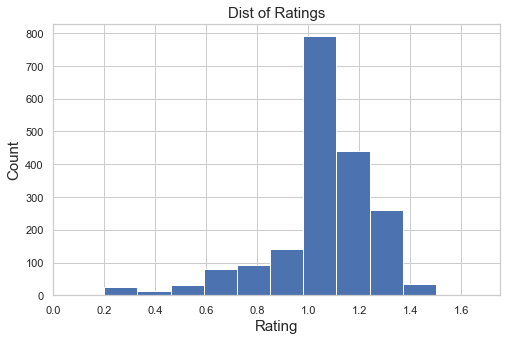

In [114]:
data_frame.rating.plot(kind='hist', xlim=[0,1.75], figsize=(8,5))
plt.title('Dist of Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)

As we can see ratings are more frequent between 1 and 1.3. And Mean dog rating is 1.06

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


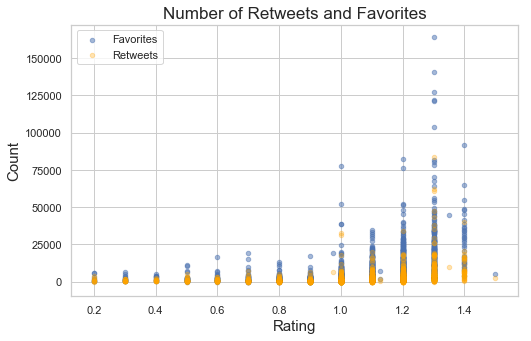

In [115]:
ax = data_frame.plot.scatter(x='rating', y='favorite_count', alpha=0.5, label='Favorites');
data_frame.plot.scatter(x='rating', y='retweet_count', color='Orange', alpha=0.3, label='Retweets', ax=ax, figsize=(8,5));
plt.title('Number of Retweets and Favorites', fontsize=17)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

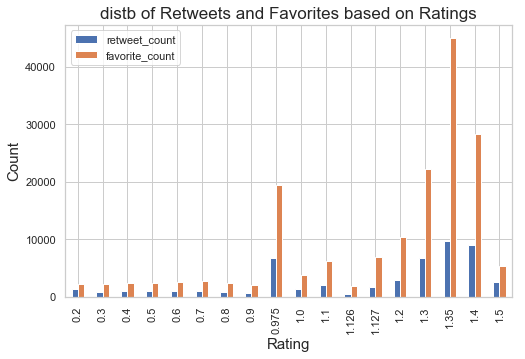

In [116]:
data_frame.groupby('rating')['retweet_count','favorite_count'].mean().plot(kind='bar', figsize=(8,5))
plt.title('distb of Retweets and Favorites based on Ratings', fontsize=17)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

1. retweet counts are lower than favorite counts for every rating
- Dogs rating b/w 1.3 & 1.4 are retweeted and liked most.

It shows that there is a +ve correlation b/w retweet counts and favorite counts based on ratings.

In [117]:
data_frame[['rating','retweet_count','favorite_count']].corr(method = 'pearson')

,rating,retweet_count,favorite_count
rating,1.000000,0.306295,0.406224
retweet_count,0.306295,1.000000,0.930268
favorite_count,0.406224,0.930268,1.000000


Pearson correlation coefficients show that there is +ve correlation b/w retweet counts and favorite counts. But there is no correlation between ratings and retweet counts, as well as ratings and favorite counts.It might be a reason that ratings are given by only one account holder WeRateDogs and they are quite subjective. 

In [118]:
data_frame.breed.value_counts()[:25]

None                         289
Golden retriever             147
Labrador retriever           99 
Pembroke                     92 
Chihuahua                    90 
Pug                          59 
Toy poodle                   47 
Chow                         44 
Pomeranian                   42 
Samoyed                      38 
Malamute                     32 
French bulldog               28 
Chesapeake bay retriever     28 
Cocker spaniel               27 
Miniature pinscher           24 
Staffordshire bullterrier    21 
Shih-tzu                     20 
Beagle                       20 
Siberian husky               20 
Eskimo dog                   20 
German shepherd              20 
Rottweiler                   19 
Cardigan                     19 
Shetland sheepdog            18 
Kuvasz                       18 
Name: breed, dtype: int64

dog breed which are tweeted greater than 20-times and exclude category 'None'.

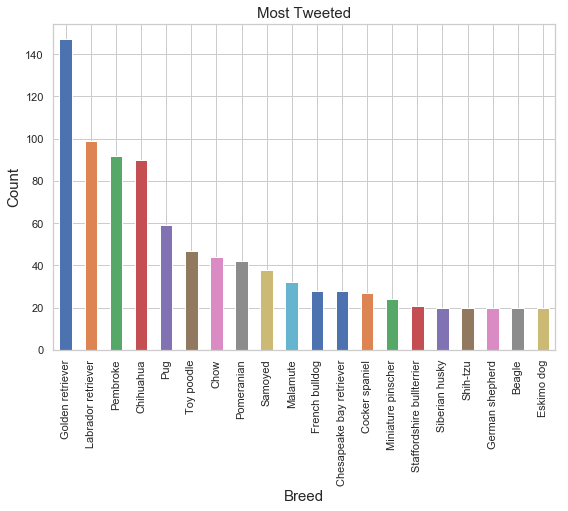

In [119]:
hot_breeds=data_frame.groupby('breed').filter(lambda x: 200 > len(x) > 19)
hot_breeds['breed'].value_counts().plot(kind = 'bar', figsize=(9,6))
plt.title('Most Tweeted', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.show()

dog_breeds in dec order: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug.

Text(0, 0.5, 'Average Rating')

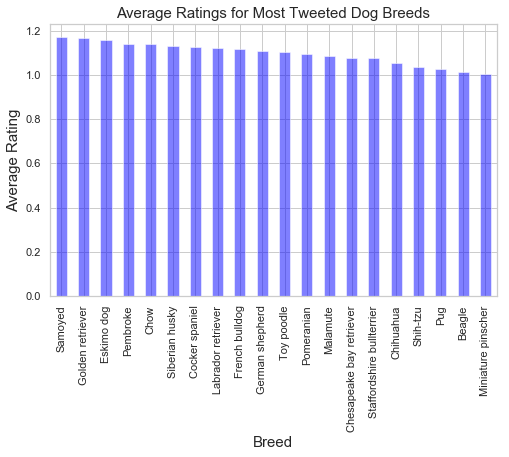

In [120]:
hot_breeds.groupby('breed')['rating'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Blue', alpha=0.5,figsize=(8,5))
plt.title('Average Ratings for Most Tweeted Dog Breeds', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)


Most tweeted dog breeds with the highest rating in dec order --> Samoyed, Golden Retriever, Pembroke, Eskimo Dog, Chow



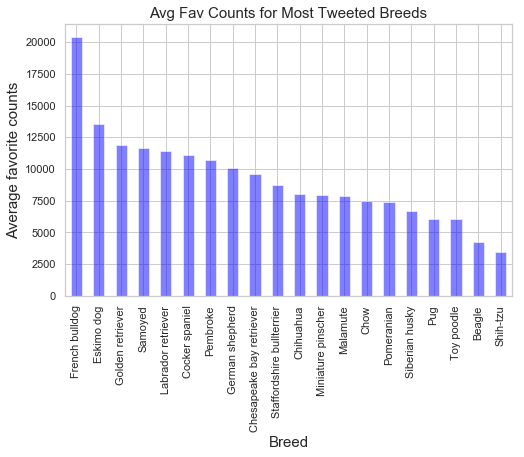

In [121]:
hot_breeds.groupby('breed')['favorite_count'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Blue', alpha=0.5, figsize=(8,5))
plt.title('Avg Fav Counts for Most Tweeted Breeds', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Average favorite counts', fontsize=15)
plt.show()

As we can see in upper graph, the dog breeds in decreasing order of number of likes are as --> French Bulldog, Cocker Spaniel, Eskimo Dog, Golden Retriever, Samoyed etc

The high rating breed is dissimilar from Most liked breeds.But there are Samoyed, Golden Retriever, and Eskimo Dog whose are common in both.

In [122]:
data_frame.dog_stage.value_counts()

None      1566
pupper    223 
doggo     70  
puppo     28  
floof     21  
Name: dog_stage, dtype: int64

floof have least number

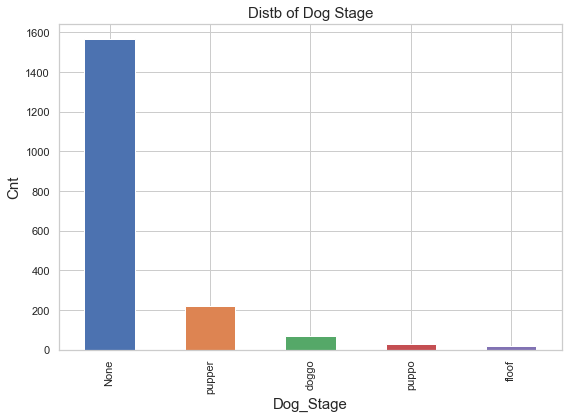

In [123]:
data_frame.dog_stage.value_counts().plot(kind = 'bar', figsize=(9,6))
plt.title('Distb of Dog Stage', fontsize=15)
plt.ylabel('Cnt', fontsize=15)
plt.xlabel('Dog_Stage', fontsize=15)
plt.show()

There is 1550+ unknown dog names which makes diffcult for analyze, So putting it out for analyzing

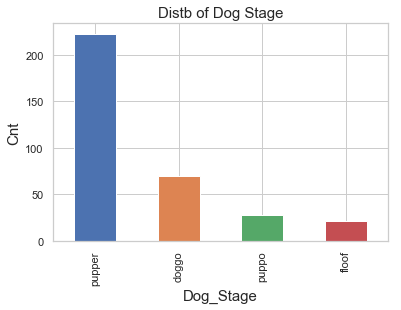

In [124]:
dog_stages=data_frame.groupby('dog_stage').filter(lambda x: len(x) < 250)
dog_stages['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('Distb of Dog Stage', fontsize=15)
plt.ylabel('Cnt', fontsize=15)
plt.xlabel('Dog_Stage', fontsize=15)
plt.show()

So clearly we can see that dog named pupper are large in number.

Text(0, 0.5, 'Avg_Rating')

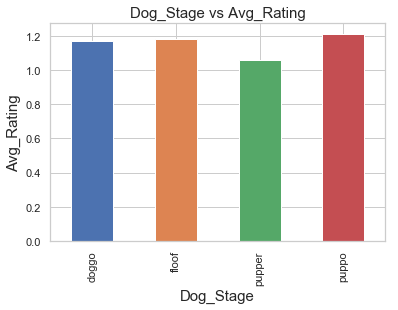

In [125]:
dog_stages.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Dog_Stage vs Avg_Rating', fontsize=15)
plt.xlabel('Dog_Stage', fontsize=15)
plt.ylabel('Avg_Rating', fontsize=15)

All the dogs have almost similar rating but if we go for deep, we can see puppo have large rating.

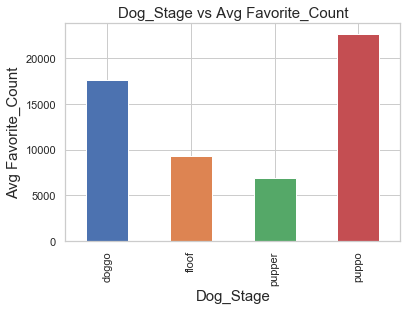

In [126]:
dog_stages.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Dog_Stage vs Avg Favorite_Count', fontsize=15)
plt.xlabel('Dog_Stage', fontsize=15)
plt.ylabel('Avg Favorite_Count', fontsize=15)
plt.show()

Dog stage puppo have highest and pupper have lowest fav count. Ratings are provided in subjected way by an account weratedogs, So there can be such differences bw rating and like_counts that we are seeing.

### Result

1. Dog breed prediction by Neural network is not 100 percent accurate because we have seen some other images like fish.
2.  The dog stages are not mentioned in the tweets, so there is more work to do apart from extraction, correction and cleaning.
- A number of tweets rate other things. That's why there is low rating so again more cleaning to do.
- retweets, ratings and favorites aren't associated with dog images and videos, account holder's thinking also matters